In [9]:
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

### iris 데이터셋

### 꽃 종류 분류하기
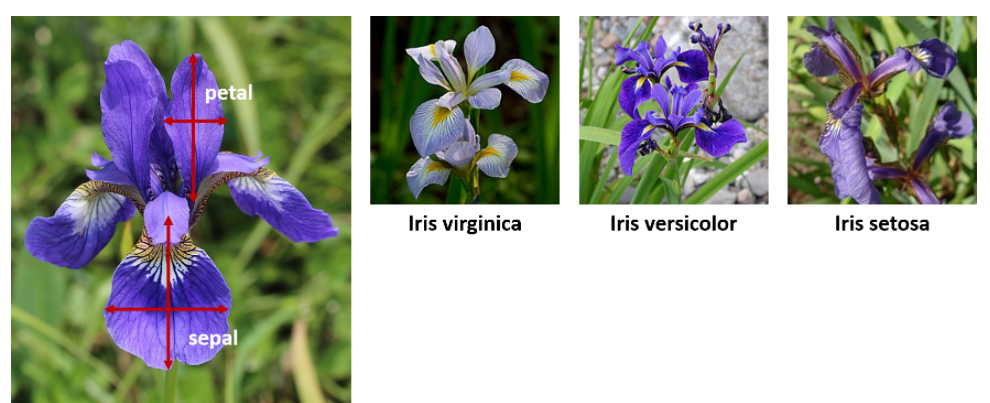

[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [11]:
from sklearn.datasets import load_iris

In [12]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [13]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [16]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [17]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [18]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [0]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df_iris['target'] = target

In [20]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

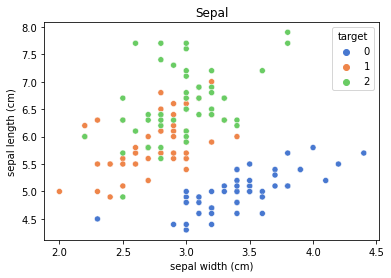

In [22]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

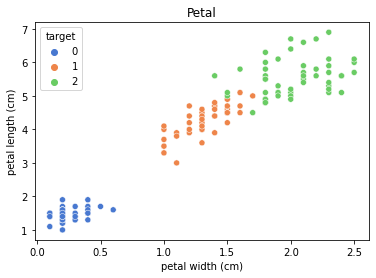

In [23]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

In [26]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


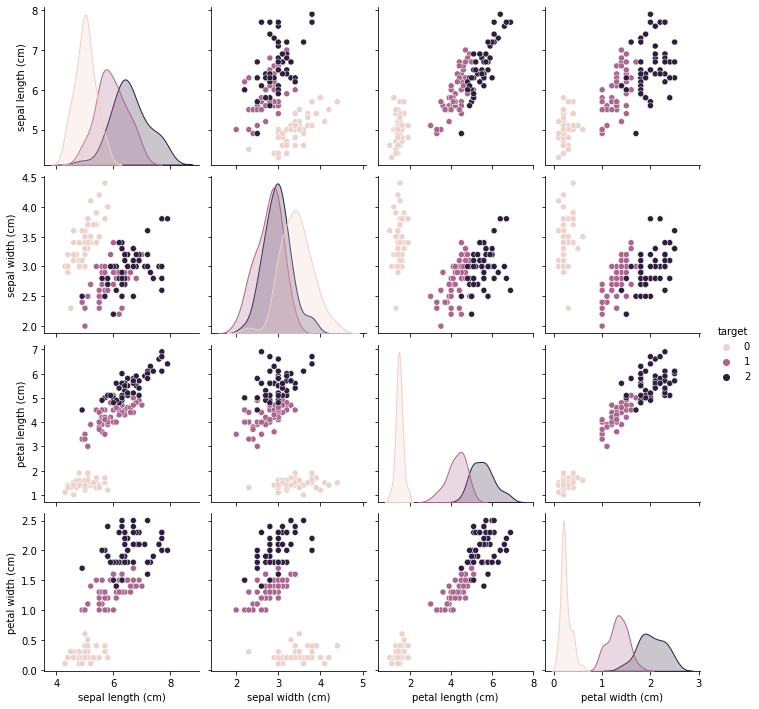

In [34]:
sns.pairplot(df_iris, hue='target')

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df_iris.iloc[:,:-1], df_iris['target'])

In [40]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [41]:
x_test.shape, y_test.shape

((38, 4), (38,))

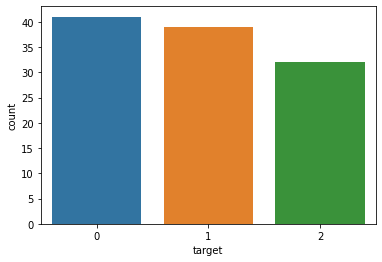

In [0]:
sns.countplot(y_train)

## stratify: label의 클래스의 분포를 균등하게 배분

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

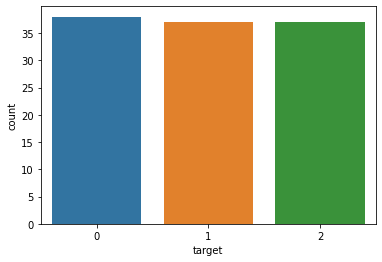

In [63]:
sns.countplot(y_train)

In [64]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [65]:
X_test.shape, y_test.shape

((38, 4), (38,))

### Logistic Regression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

**하이퍼 파라미터 설명**
1. L1, L2 규제 (과대적합하지 않도록 강제로 제한함)
  - L1규제(랏쏘):
    - 계수를 0으로 가깝게 만들고, 어떤 계수는 진짜로 0이 될 수 있음.
    - alpha 매개변수로 값의 정도를 조절함 (alph=1.0이 기본값임)
  - L2규제(릿지): 
    - 가중치의 절대값을 가능한 작게 만들어 0으로에 가깝기 만든다.
    - 그렇다고 해서 계수가 0이 되진 않음.기울기를 작게 만듬
  

2. 매개 변수 C
  - C의 값이 낮아지면 데이터 포인터 중 다수에 맞춤 (규제강도가 증가)
  - C의 값을 옾이면 개개의 데이터 포인트를 정확히 분류하려 함

3. solover 매개변수 : 
  - 'newton-cg', 'lbfgs', 'liblinear', 'sag','saga' 등 지정
  - 'lbfgs'는 다중 분류에 유연하게 대처할 수 있음
  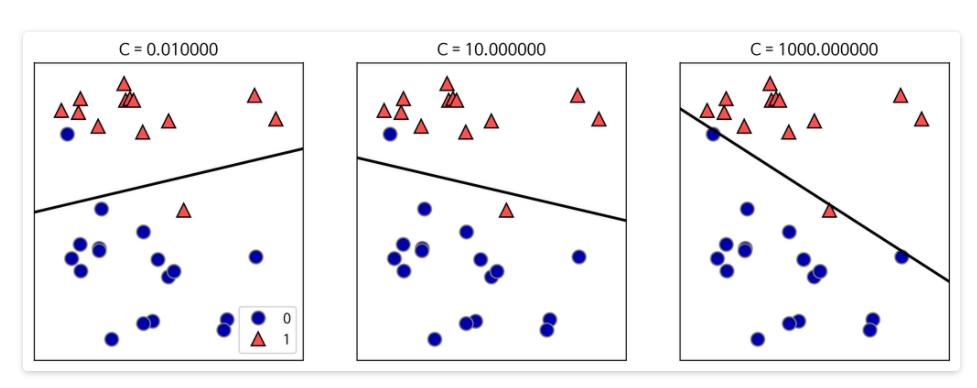

In [113]:
from sklearn.linear_model import LogisticRegression

**step 1: 모델 선언**

In [66]:
model=LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)

**step 2: 모델 학습**

In [67]:
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

**step 3: 예측**

In [68]:
prediction = model.predict(X_test)

In [69]:
prediction[:5]

array([1, 0, 2, 0, 2])

**step 4: 평가**

In [70]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9910714285714286
평가 데이터 점수: 0.9736842105263158


### 참고: 최적의 하이퍼파라미터 찾기
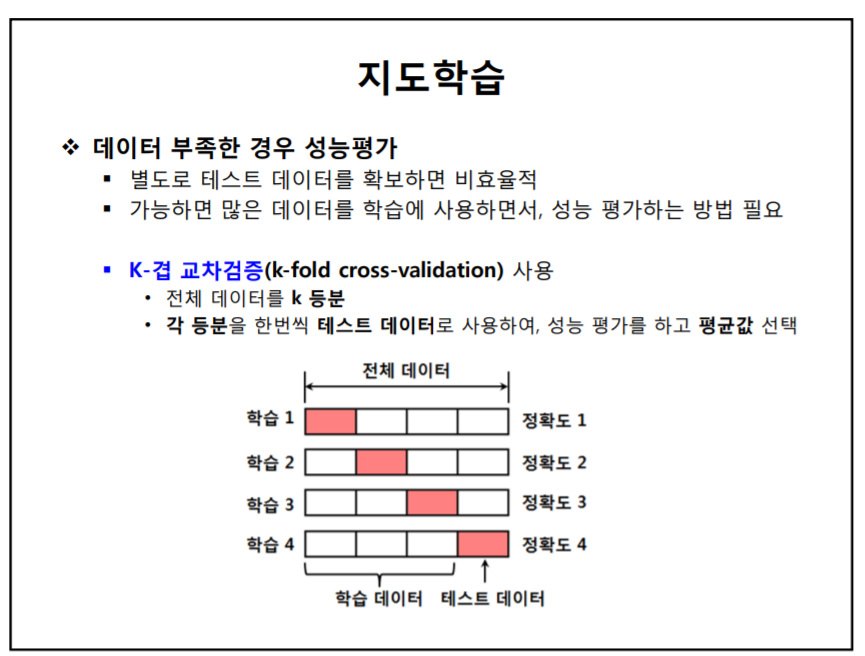

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'penalty': ['l1','l2'],
            'C':[2.0, 2.2, 2.4, 2.6, 2.8]}]

gs=GridSearchCV(estimator=LogisticRegression(),
               param_grid=param_grid,
               scoring='accuracy', cv=10)
gs

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [91]:
result=gs.fit(df_iris.iloc[:,:-1],df_iris['target'])

In [92]:
print(gs.best_estimator_)
print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))

LogisticRegression(C=2.4)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


## 정확도(Accuracy)
https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html

In [89]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [90]:
from sklearn.metrics import classification_report

predict=model.predict(X_test)
print(classification_report(y_test, predict, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## 유방암 로지스틱 회귀 분석

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [99]:
cancer=load_breast_cancer()

In [101]:

X_train, X_test, y_train, y_test=train_test_split(cancer['data'],cancer['target'])

In [102]:
model=LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [103]:
print('학습데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가데이터 점수: {}'.format(model.score(X_test, y_test)))

학습데이터 점수: 0.971830985915493
평가데이터 점수: 0.9300699300699301


In [104]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'penalty': ['l1','l2'],
            'C':[2.0, 2.2, 2.4, 2.6, 2.8]}]

gs=GridSearchCV(estimator=LogisticRegression(),
               param_grid=param_grid,
               scoring='accuracy', cv=10)
gs

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [111]:
gs.fit(cancer['data'],cancer['target'])

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [112]:
print(gs.best_estimator_)
print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))

LogisticRegression(C=2.8)
최적 점수: 0.9455513784461151
최적 파라미터: {'C': 2.8, 'penalty': 'l2'}


In [108]:
from sklearn.metrics import classification_report

predict=model.predict(X_test)
print(classification_report(y_test, predict, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.87      0.91        55
      benign       0.92      0.97      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

